In [84]:
import numpy as np
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('../data/')

['train_quality_data.csv',
 'train_problem_data.csv',
 'test_err_data.csv',
 'sample_submission.csv',
 'test_quality_data.csv',
 'train_err_data.csv']

In [4]:
train_err = pd.read_csv("../data/train_err_data.csv")

In [9]:
train_err.shape

(16554663, 6)

In [5]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [7]:
len(train_err.user_id.unique())

15000

In [10]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [12]:
train_err.user_id.value_counts().describe()

count     15000.000000
mean       1103.644200
std        3561.565741
min           1.000000
25%         402.750000
50%         657.000000
75%        1047.000000
max      222186.000000
Name: user_id, dtype: float64

In [38]:
train_err.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

In [15]:
train_err.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

In [16]:
train_err.fwver.unique()

array(['05.15.2138', '04.33.1185', '04.33.1261', '04.22.1750',
       '04.22.1778', '04.16.3553', '04.33.1149', '04.16.3571',
       '05.66.3237', '05.66.3571', '03.11.1149', '04.22.1684',
       '03.11.1167', '04.82.1684', '04.82.1778', '04.33.1171',
       '04.73.2237', '10', '04.82.1730', '04.73.2571', '8.5.3',
       '04.22.1666', '03.11.1141', '05.15.2120', '04.33.1125',
       '04.16.3439', '04.22.1442', '04.33.1095', '04.16.3569',
       '05.15.2090', '05.15.3104', '05.15.2122', '04.22.1656',
       '04.16.2641', '05.15.2114', '04.16.3345', '05.15.2092'],
      dtype=object)

In [17]:
train_err.errtype.unique()

array([15, 12, 11, 16,  4, 26, 10, 14,  3, 13,  6,  7, 27, 28, 31, 33, 22,
       41,  5, 40, 34, 37, 36, 23, 18, 20, 19, 21, 42, 24, 25, 17, 38, 39,
       35, 32, 30,  2,  1,  9,  8])

In [20]:
train_err.errcode.unique()

array(['1', '0', '2', ..., '4526', '3965', '25999'], dtype=object)

In [25]:
time_data = train_err[['user_id','time']]

In [27]:
time_data.head()

,user_id,time
0,10000,20201101025616
1,10000,20201101030309
2,10000,20201101030309
3,10000,20201101050514
4,10000,20201101050515


In [28]:
time_data['year'] =time_data.loc[:,'time'].astype("str").str[:4].astype("int")
time_data['month'] =time_data.loc[:,'time'].astype("str").str[4:6].astype("int")
time_data['days'] =time_data.loc[:,'time'].astype("str").str[6:8].astype("int")
time_data['hours'] =time_data.loc[:,'time'].astype("str").str[8:10].astype("int")
time_data['minites'] =time_data.loc[:,'time'].astype("str").str[10:12].astype("int")
time_data['sec'] =time_data.loc[:,'time'].astype("str").str[12:].astype("int")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,user_id,time,year,month,days,hours,minites,sec
0,10000,20201101025616,2020,11,1,2,56,16
1,10000,20201101030309,2020,11,1,3,3,9
2,10000,20201101030309,2020,11,1,3,3,9
3,10000,20201101050514,2020,11,1,5,5,14
4,10000,20201101050515,2020,11,1,5,5,15


In [33]:
print('년도 유일값 :',time_data.year.unique())
print('월도 유일값 :',sorted(time_data.month.unique()))
print('일자도 유일값 :',sorted( time_data.days.unique()))
print('시간 유일값 :',sorted(time_data.hours.unique()))
print('분 유일값 :',sorted(time_data.minites.unique()))
print('초 유일값 :',sorted(time_data.sec.unique()))

년도 유일값 : [2020]
월도 유일값 : [10, 11, 12]
일자도 유일값 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
시간 유일값 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
분 유일값 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
초 유일값 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [34]:
train_err

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [219]:
time_counts_drop=time_counts_d.groupby("user_id")[0].max().reset_index().sort_values(0,ascending=False).reset_index(drop=True)
time_counts_drop

,user_id,0
0,24402,625
1,17560,170
2,17687,136
3,19876,97
4,16947,96
...,...,...
14995,17100,1
14996,18998,1
14997,19936,1
14998,18999,1


In [77]:
time_counts_d[['user_id','time']].value_counts('user_id').describe()

count     15000.000000
mean        920.118467
std        2462.450457
min           1.000000
25%         338.000000
50%         547.000000
75%         868.000000
max      195284.000000
dtype: float64

In [80]:
time_counts_d[['user_id','time']]['time'].min() ,time_counts_d[['user_id','time']]['time'].max()

(20201031235959, 20201202185152)

In [132]:
pd.to_datetime(time_counts_d['time'].astype("str").values[:10])

DatetimeIndex(['2020-11-01 02:56:16', '2020-11-01 03:03:09',
               '2020-11-01 05:05:14', '2020-11-01 05:05:15',
               '2020-11-01 05:05:16', '2020-11-01 05:05:22',
               '2020-11-01 06:09:03', '2020-11-01 17:47:54',
               '2020-11-01 17:47:56', '2020-11-01 17:48:03'],
              dtype='datetime64[ns]', freq=None)

In [170]:
time_counts_d['time'] =time_counts_d['time'].astype("int")

In [180]:
time_new_df = (time_counts_d['time']//(10**10)).astype("str") +"-"+(time_counts_d['time']//(10**8)%100).astype("str") +"-"+(time_counts_d['time']//(10**6)%100).astype("str") +" "+(time_counts_d['time']//(10**4)%100).astype("str")  +":"+(time_counts_d['time']//(10**2)%100).astype("str") +":"+(time_counts_d['time']%100).astype("str") 

In [185]:
time_counts_d['time2'] = pd.to_datetime(time_new_df)

In [187]:
time_counts_d.head()

,user_id,time,0,time2
0,10000,20201101025616,1,2020-11-01 02:56:16
1,10000,20201101030309,2,2020-11-01 03:03:09
2,10000,20201101050514,1,2020-11-01 05:05:14
3,10000,20201101050515,1,2020-11-01 05:05:15
4,10000,20201101050516,1,2020-11-01 05:05:16


In [194]:
time_counts_d.user_id.unique()

array([10000, 10001, 10002, ..., 24997, 24998, 24999])

In [314]:
time_counts_d.time.max()

20201202185152

In [215]:
time_counts_drop

,user_id,0
0,24402,625
1,17560,170
2,17687,136
3,19876,97
4,16947,96
5,20021,96
6,11367,85
7,24110,65
8,20204,63
9,21424,56


In [223]:
time_counts_drop.user_id[:3000]

0       24402
1       17560
2       17687
3       19876
4       16947
        ...  
2995    22751
2996    24651
2997    10721
2998    22747
2999    24655
Name: user_id, Length: 3000, dtype: int64

In [226]:
time_counts_drop[:200]

,user_id,0
0,24402,625
1,17560,170
2,17687,136
3,19876,97
4,16947,96
...,...,...
195,14222,12
196,20232,12
197,15691,12
198,10311,12


In [302]:
q

,index,user_id
0,19372,1
1,11157,1
2,24982,1
3,21960,1
4,12532,1
...,...,...
14995,16759,43223
14996,24934,45660
14997,14724,51571
14998,11041,65768


In [310]:
q=time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()
time_counts_drop.loc[time_counts_drop['user_id']==24402]

,user_id,0
0,24402,625


In [311]:
import datetime

In [312]:
pd.to_datetime("2020-10-01") + datetime.timedelta(days=5)

Timestamp('2020-10-06 00:00:00')

In [297]:
time_counts_d.user_id.value_counts().sort_values().sort_index()

10000     285
10001    2201
10002     284
10003     244
10004     693
         ... 
24995     152
24996       3
24997     741
24998     113
24999     495
Name: user_id, Length: 15000, dtype: int64

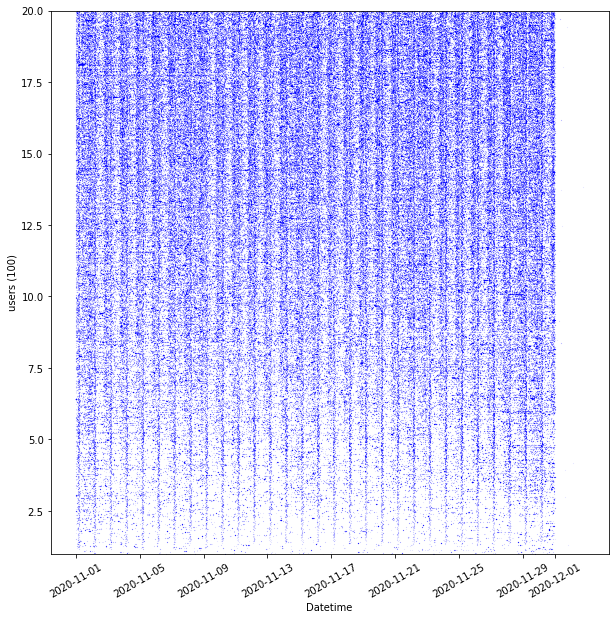

In [256]:
plt.figure(figsize=(10,10))

n=0
ball_size=0.001
update_n = 0.005

for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:4000]:
    new_data =time_counts_d.loc[time_counts_d.user_id ==value]
    plt.scatter(new_data.time2,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n
    
plt.ylim(0.99,20)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()

하위 4000개의 에러 발생시간 (발생시간 중복 데이터 제외)에 대한 시각화    
하단부를 보면 특정 시간대에서 많이 발생한 경향을 확인 할수 있다. 하루에 한번씩 특정시간대에 피크    
하루에 한번씩 업데이트 되는 시스템으로 예상    

In [285]:
time_counts_d['time3'] = pd.to_datetime(time_counts_d.time2.dt.strftime('%Y-%m-%d %H:%M'))

In [286]:
time_counts_d['time4'] = pd.to_datetime(time_counts_d.time2.dt.strftime('%Y-%m-%d %H'))

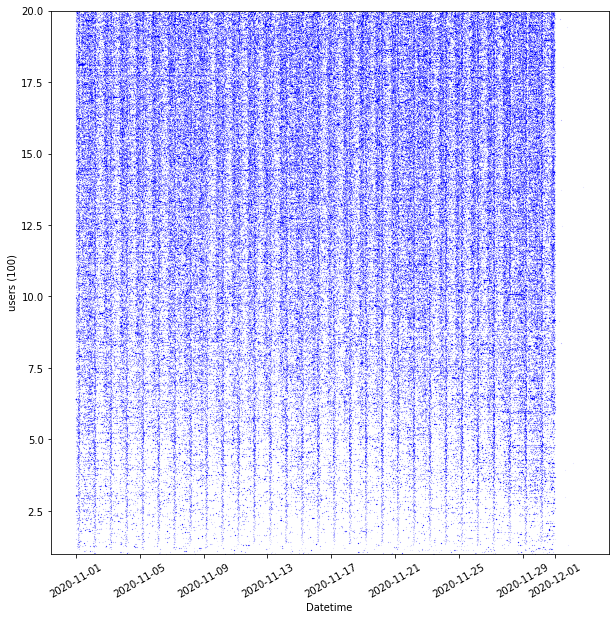

In [287]:
plt.figure(figsize=(10,10))

n=0
ball_size=0.001
update_n = 0.005

for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:4000]:
    new_data =time_counts_d.loc[time_counts_d.user_id ==value]
    plt.scatter(new_data.time3,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n
    
plt.ylim(0.99,20)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()

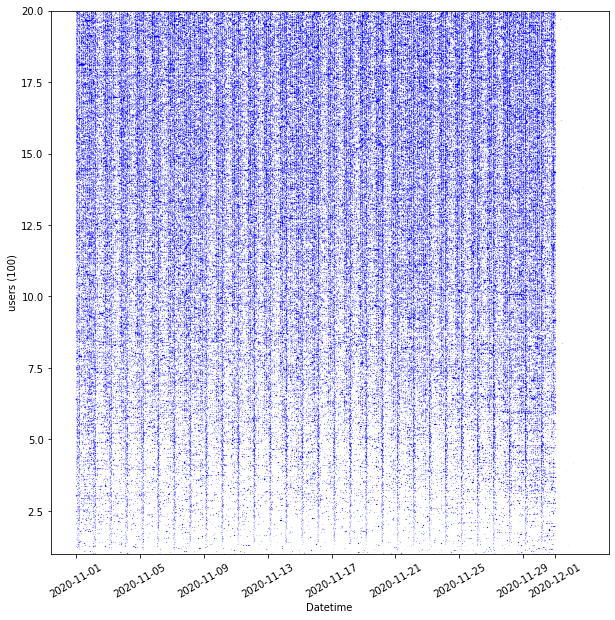

In [288]:
plt.figure(figsize=(10,10))

n=0
ball_size=0.001
update_n = 0.005

for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:4000]:
    new_data =time_counts_d.loc[time_counts_d.user_id ==value]
    plt.scatter(new_data.time4,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n
    
plt.ylim(0.99,20)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()

In [292]:
df2=time_counts_d.loc[(time_counts_d.time4 < pd.to_datetime("2020-11-05"))]

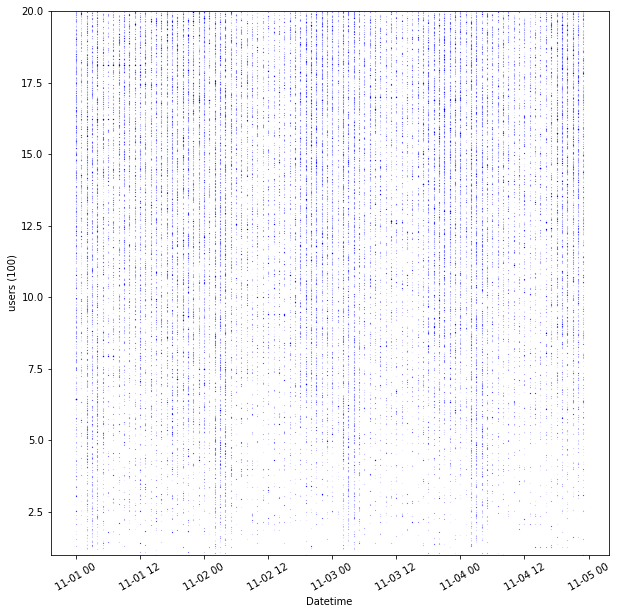

In [293]:
plt.figure(figsize=(10,10))

n=0
ball_size=0.001
update_n = 0.005

for value in time_counts_d.user_id.value_counts().sort_values().to_frame().reset_index()['index'][:4000]:
    new_data =df2.loc[df2.user_id ==value]
    plt.scatter(new_data.time4,np.zeros(len(new_data))+n,s=ball_size,c='blue')
    n+=update_n
    
plt.ylim(0.99,20)
plt.xlabel("Datetime")
plt.ylabel("users (100)")
plt.xticks(rotation=30)
plt.show()